In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
data = pd.read_csv('./data/train.csv',encoding='utf8')
# Assume 'data' is your DataFrame and 'target' is the column with labels
data['arrival_is_estimated'] = data['arrival_is_estimated'].map({True: 1, False: 0}).fillna(0).astype(int)

# Convert categorical variables to numeric
categorical_cols = [ 'direction', 'alternative', 'cluster', 'station_name','part']
for col in categorical_cols:
    data[col] = pd.Categorical(data[col]).codes
# Fill NaN values with 0 FOR NOW CHANGE IT TO MEAN OR SOMETHING ELSE
## DONT FORGET TO CHANGE IT ##############################################
data = data.fillna(0)

data.drop(['trip_id', 'trip_id_unique_station', 'trip_id_unique', 
                       'arrival_time', 'door_closing_time', 'mekadem_nipuach_luz', 
                       'passengers_continue_menupach'], axis=1, inplace=True)
X = data.drop(columns=['passengers_up'])
y = data['passengers_up']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean()}')


Accuracy: 0.6404997512300293
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     22091
           1       0.39      0.39      0.39      5833
           2       0.24      0.22      0.23      3198
           3       0.17      0.14      0.15      1798
           4       0.14      0.12      0.13      1117
           5       0.11      0.09      0.10       690
           6       0.09      0.08      0.09       447
           7       0.14      0.12      0.13       293
           8       0.08      0.07      0.07       195
           9       0.06      0.05      0.06       131
          10       0.05      0.04      0.05       101
          11       0.07      0.08      0.07        49
          12       0.06      0.03      0.04        68
          13       0.00      0.00      0.00        38
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        15
          16       0.00      

c:\Users\RedmiBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RedmiBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RedmiBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

Cross-Validation Accuracy: 0.6396057303609922


count    226111.000000
mean          1.062111
std           2.114037
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          50.000000
Name: passengers_up, dtype: float64


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 50]

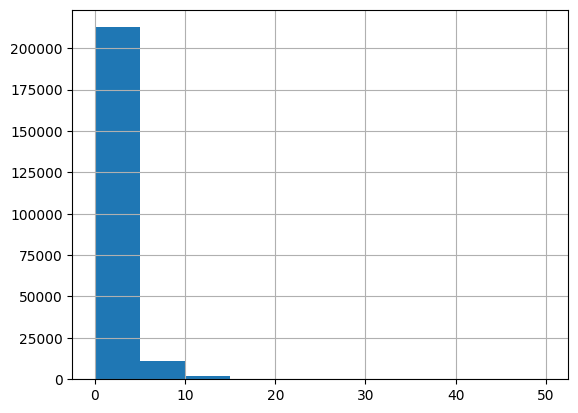

In [13]:
data = pd.read_csv('./data/REAL_DATA.csv',encoding='ISO-8859-8')
#show distribution of feature arrival_is_estimated
print(data['passengers_up'].describe())
data['passengers_up'].hist()
sorted(data['passengers_up'].unique())

#same for every feature 
#show distribution of feature arrival_delay

